# Lending Club Data

Vinciane DESBOIS, Application for an internship at Boltzmann

In [1]:
# data analysis
import pandas as pd
import numpy as np

# data vizualisation
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\Vinciane\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## I] Data Cleaning

### 1) Data Importation

On the Kaggle page, two databases provided by Lending Club  : 
1. a database with **accepted loans**, as well as information on the borrower and the status of the loan
2. a database with **rejected loans**. 

In the context of my topic, where my objective is to predict **overdue loans for "credit risk"**, the priority is not to study rejected applications, which tell us nothing about repayment. 
I therefore focus on the basis of loans accepted between 2007 and 2018.

To download the database, I follow the indication : https://www.kaggle.com/wordsforthewise/eda-with-python
and I check that the imports correspond to those expected.

In [2]:
acc_df = pd.read_csv(r'~\accepted_2007_to_2018Q4.csv.gz', compression = 'gzip') # data importation
print(acc_df.shape)
#rej_df = pd.read_csv(r'~\rejected_2007_to_2018Q4.csv.gz', compression = 'gzip')

C:\Users\Vinciane\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (0,19,49,59,118,129,130,131,134,135,136,139,145,146,147) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(2260701, 151)


In [3]:
acc_df.head()
#The import went well, but we can see that there is a lot of Nan in the database.

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,68407277,NaN,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,68355089,NaN,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,68341763,NaN,20000.0,20000.0,20000.0,60 months,10.78,432.66,B,B4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,66310712,NaN,35000.0,35000.0,35000.0,60 months,14.85,829.90,C,C5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,68476807,NaN,10400.0,10400.0,10400.0,60 months,22.45,289.91,F,F1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


### 2) Columns selection

- The **columns with enough data**

In order to have relevant data, it must be present in almost the entire databse. To do this, only data present in more than 90% of the rows are taken.

In [4]:
# Variables that contain less than 90% of the data are more difficult to interpret. We set them apart.
acc_df_reduced= acc_df.drop(acc_df.loc[:, acc_df.isna().mean().sort_values() > 0.1].columns, axis=1)

- **Information** about each columns


In [5]:
# Get more information about the columns
data_info = pd.read_excel('https://resources.lendingclub.com/LCDataDictionary.xlsx', index_col='LoanStatNew')

# We print the information for every variable
def col_info(col_name):
    print(data_info.loc[col_name]['Description'])

for col_name in acc_df_reduced.columns.drop('total_rev_hi_lim'): # The colums total_rev_hi_lim is not in the description
    print(col_name), col_info(col_name)

id
A unique LC assigned ID for the loan listing.
loan_amnt
The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.
funded_amnt
The total amount committed to that loan at that point in time.
funded_amnt_inv
The total amount committed by investors for that loan at that point in time.
term
The number of payments on the loan. Values are in months and can be either 36 or 60.
int_rate
Interest Rate on the loan
installment
The monthly payment owed by the borrower if the loan originates.
grade
LC assigned loan grade
sub_grade
LC assigned loan subgrade
emp_title
The job title supplied by the Borrower when applying for the loan.*
emp_length
Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 
home_ownership
The home ownership status provided by the borrower during registration or obtained from the credit

In [6]:
# we can delete useless columns 
acc_df_reduced.drop('id', axis=1, inplace=True) # not useful for the model
acc_df_reduced.drop('url', axis=1, inplace=True) # not useful for the model
acc_df_reduced.drop('title', axis=1, inplace=True) # title is defined according to purpose
acc_df_reduced.drop('addr_state', axis=1, inplace=True) # we will use zip_code

In [7]:
#These following variables are time variables
#I suppress them for a reason of lack of time, but it would be essential to take care of them if we conduct a long term analysis
acc_df_reduced.drop(['earliest_cr_line','last_credit_pull_d', 'last_pymnt_d', 'issue_d'], axis=1, inplace=True)

### 3) Some Data Vizualisation

First, we focus on the data that seem  essential, such as the amount of the loan, the interest rate, the annual income and the dti (ratio monthly debt payments on the total debt obligations).

In [8]:
# We first create a sub-sample, in order to see the data and correlations
acc_df_reduced_1= acc_df_reduced[['loan_amnt','int_rate', 'installment','annual_inc','dti', 'loan_status']]
acc_df_reduced_2= acc_df_reduced[['loan_amnt','int_rate', 'installment','annual_inc','dti']]

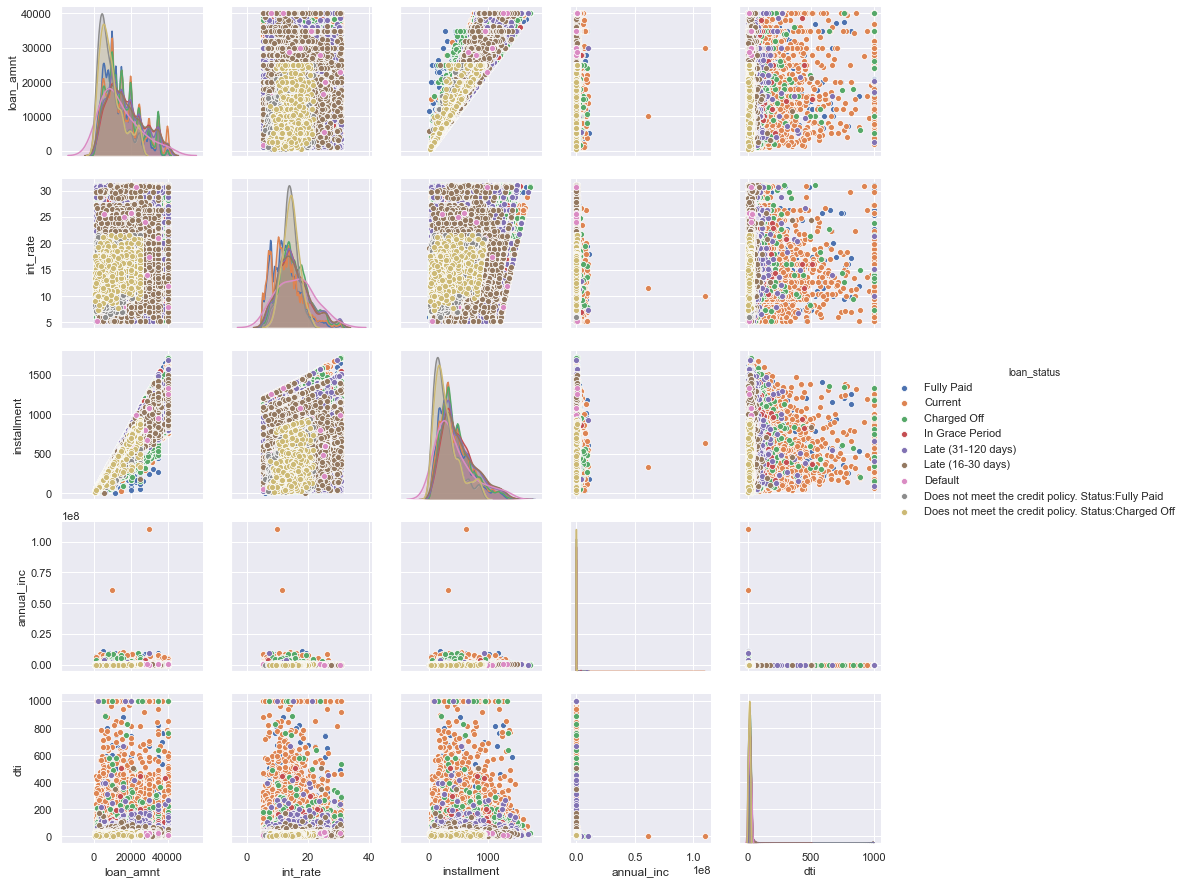

In [9]:
sns.set()
sns.pairplot(acc_df_reduced_1, hue ="loan_status");
plt.show()

At first glance, you can see that some data stands out, especially in orange. They are probably outliers. As we are only going to keep the lines where the loan is "Fully Paid" or "Charged Off", we don't have to worry about it.

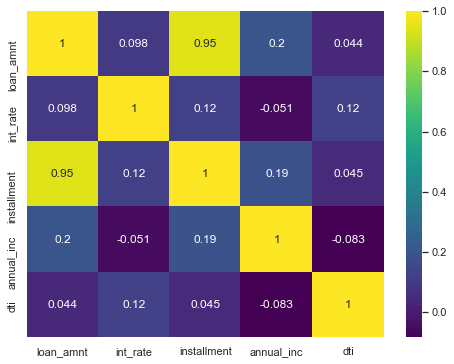

In [10]:
plt.figure(figsize=(8, 6))
sns.heatmap(acc_df_reduced_2.corr(), annot=True, cmap="viridis")

We can notice that there are correlations, such as between installation and loan_amnt. Indeed, it is logical: the amount per month is highly correlated with the total amount. The import of the data thus seems logical and well done.

### 4) Transformation of "object" variables


In [11]:
acc_df_reduced.info() # On regarde les objets de nos données

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2260701 entries, 0 to 2260700
Data columns (total 84 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   loan_amnt                   float64
 1   funded_amnt                 float64
 2   funded_amnt_inv             float64
 3   term                        object 
 4   int_rate                    float64
 5   installment                 float64
 6   grade                       object 
 7   sub_grade                   object 
 8   emp_title                   object 
 9   emp_length                  object 
 10  home_ownership              object 
 11  annual_inc                  float64
 12  verification_status         object 
 13  loan_status                 object 
 14  pymnt_plan                  object 
 15  purpose                     object 
 16  zip_code                    object 
 17  dti                         float64
 18  delinq_2yrs                 float64
 19  fico_range_low       

- analysis of the variable **loan_status**

In [12]:
acc_df_reduced['loan_status'].unique()

array(['Fully Paid', 'Current', 'Charged Off', 'In Grace Period',
       'Late (31-120 days)', 'Late (16-30 days)', 'Default', nan,
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off'],
      dtype=object)

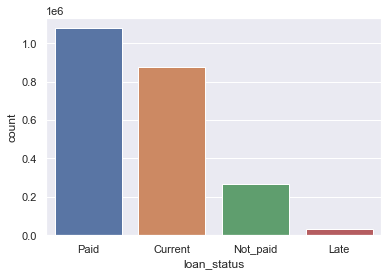

In [13]:
# We group 
acc_df_reduced['loan_status'] = acc_df_reduced['loan_status'].apply(
    lambda x: "Paid" if x == 'Fully Paid' or x=='Does not meet the credit policy. Status:Fully Paid' else x).apply(
    lambda x: "Not_paid" if x == 'Charged Off'  or x=='Default' or x== 'Does not meet the credit policy. Status:Charged Off' else x).apply (
    lambda x: "Late" if x == 'Late (16-30 days)' or x =='Late (31-120 days)' or x =='In Grace Period' else x)
sns.countplot(x="loan_status", data=acc_df_reduced)

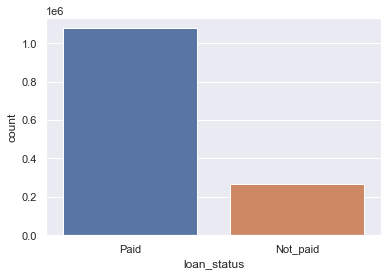

In [14]:
# We keep the lines that actually tell us whether the loan has been reimbursed or not
acc_df_reduced = acc_df_reduced.loc[(acc_df_reduced['loan_status'] == 'Paid') | (acc_df_reduced['loan_status'] == 'Not_paid')]
sns.countplot(x="loan_status", data=acc_df_reduced)

- analysis of the variable **term**

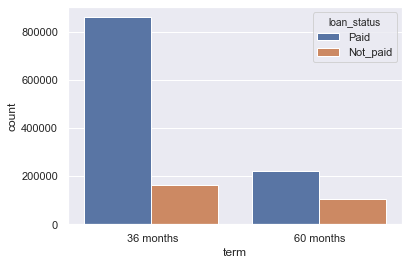

In [15]:
sns.countplot(x='term', data=acc_df_reduced, hue='loan_status')

We see that the share of unpaid loans is different whether the loans extend over 36 or 60 months. It is therefore important to keep this variable

In [16]:
# We code term to use it
acc_df_reduced['term'] = acc_df_reduced.term.map({' 36 months':36, ' 60 months':60})

- analysis of the variables **grade** and **sub_grade**

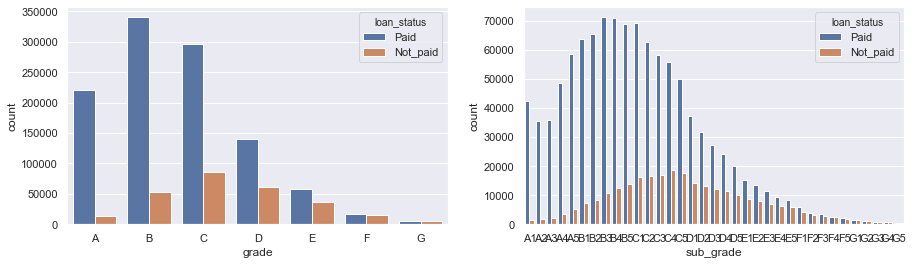

In [17]:
fig, ax = plt.subplots(1,2, figsize=(15,4))

# to make visualization easier, we order the values of grade and sub_grade to appear in alphabetical order
order1 = sorted(acc_df_reduced.grade.unique().tolist())
order2 = sorted(acc_df_reduced.sub_grade.unique().tolist())

# we show countplot for both variables
sns.countplot(x='grade', data=acc_df_reduced, hue='loan_status', order=order1, ax=ax[0])
sns.countplot(x='sub_grade', data=acc_df_reduced, hue='loan_status', order=order2, ax=ax[1])

In [18]:
# As grade is contained in sub_grade, variable grade can be deleted
acc_df_reduced.drop('grade', axis=1, inplace=True)

We note that the portion of loans reimbursed differs depending on the sub_grade (A1 to G5) assigned to the borrower. Therefore, it seems important to keep this variable.

- analysis of the variables **emp_title** and **emp_length**

In [19]:
# The variable emp_title :
nb_jobs = acc_df_reduced.groupby('emp_title')['loan_amnt'].nunique().count()
print(nb_jobs)

379863


In [20]:
# There are more than 350,000 different jobs registered and it's too many to look at each in the time allocated
# I deleted the variable
acc_df_reduced.drop('emp_title', axis=1, inplace=True)

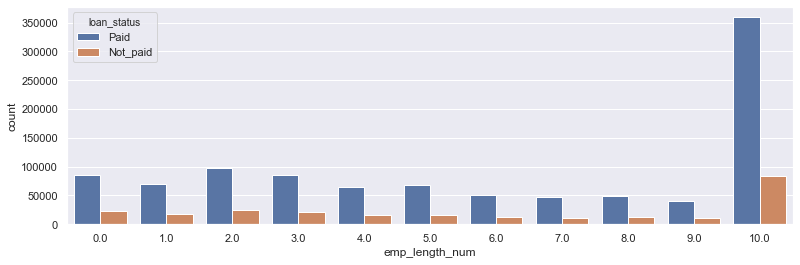

In [21]:
# Then the variable emp_length :

# Data tranformation so that it is float encoded and can be arranged in ascending order.

def emp_to_num(term):
    if pd.isna(term):
        return None
    elif term[2]=='+':
        return 10
    elif term[0]=='<':
        return 0
    else:
        return int(term[0])

acc_df_reduced['emp_length_num'] = acc_df_reduced['emp_length'].apply(emp_to_num)

fig, ax =plt.subplots(1,1, figsize=(13,4))
sns.countplot(x='emp_length_num', data=acc_df_reduced, hue = 'loan_status')


In [22]:
# Variable emp_length_num now gives us information about the duration of the current job, so we can delete emp_length.
acc_df_reduced.drop('emp_length', axis=1, inplace=True)


To have information about the duration of the current job and and its consequences on the repayment of the loan, we keep this variable.

- Analysis of the variable **purpose**

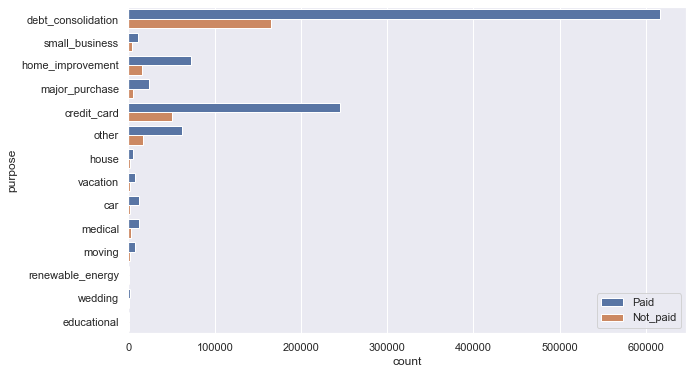

In [23]:
plt.figure(figsize=(10,6))
sns.countplot(y='purpose', data=acc_df_reduced, hue = 'loan_status')
plt.legend(loc='lower right')
plt.show()

In [24]:
# We look at the proportion of loans unpaid for each purpose
reason = acc_df_reduced['purpose'].unique()

for i in reason:
        print("For the reason", i, "the proportion of loans not reimbursed is ",
              acc_df_reduced[acc_df_reduced['purpose']== i][acc_df_reduced['loan_status'] == "Not_paid"]['loan_amnt'].count()/
              acc_df_reduced[acc_df_reduced['purpose']== i]['loan_amnt'].count())
        

C:\Users\Vinciane\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


For the reason debt_consolidation the proportion of loans not reimbursed is  0.21156656540088709
For the reason small_business the proportion of loans not reimbursed is  0.29864543878795663
For the reason home_improvement the proportion of loans not reimbursed is  0.17756295527866758
For the reason major_purchase the proportion of loans not reimbursed is  0.1860575296108291
For the reason credit_card the proportion of loans not reimbursed is  0.1693260042283298
For the reason other the proportion of loans not reimbursed is  0.21082744792531385
For the reason house the proportion of loans not reimbursed is  0.21910112359550563
For the reason vacation the proportion of loans not reimbursed is  0.1919859092910612
For the reason car the proportion of loans not reimbursed is  0.14721539721539723
For the reason medical the proportion of loans not reimbursed is  0.21845779428717818
For the reason moving the proportion of loans not reimbursed is  0.23399118202813354
For the reason renewable_en

We note that the proportion of people who do not repay their credit varies according to the purpose for which it is used. So we keep the variable purpose.

- Analysis of the variable **home_ownership**

In [25]:
acc_df_reduced['home_ownership'] = acc_df_reduced['home_ownership'].apply(
    lambda x: "OTHER" if x == 'ANY' or x=='OTHER' or x=='NONE' else x)

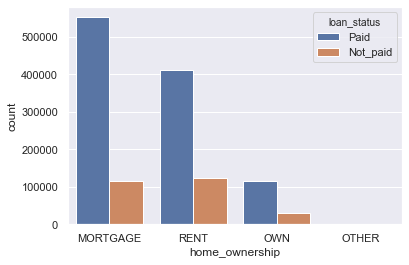

In [26]:
sns.countplot(x='home_ownership', hue='loan_status', data=acc_df_reduced)

As can be seen in this graphic, home ownership affects the repayment. We keep this variable.

- analysis of the variable **zip_code**

In [27]:
# We only keep the 2 first number of zip_code, to keep an idea of the geographical distribution
acc_df_reduced['zip_code'] = acc_df_reduced['zip_code'].str[:2] 

- Analysis of the variable **application_type**

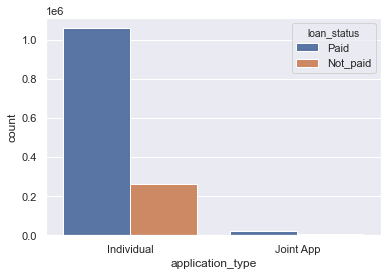

In [28]:
sns.countplot(x='application_type', hue='loan_status', data=acc_df_reduced)

In [29]:
contract = acc_df_reduced['application_type'].unique()

for i in contract:
        print("When the contract is", i, "the proportion of loans not reimbursed is ",
              acc_df_reduced[acc_df_reduced['application_type']== i][acc_df_reduced['loan_status'] == "Not_paid"]['loan_amnt'].count()/
              acc_df_reduced[acc_df_reduced['application_type']== i]['loan_amnt'].count())
        

C:\Users\Vinciane\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


When the contract is Individual the proportion of loans not reimbursed is  0.19890447881067208
When the contract is Joint App the proportion of loans not reimbursed is  0.24606680616910795


The type of contract has an effect on the chances of paying back the loan, so we keep this variable

-  Transformation **from object to numeric variables**

In [30]:
# We convert the loan_status
acc_df_reduced['loan_status'] = acc_df_reduced.loan_status.map({'Paid':0, 'Not_paid':1})

In [31]:
# transforms "object" data into numeric data with the get_dummies methods : only 0 and 1 in a lot of columns
dummies = ['term', 'sub_grade','purpose','home_ownership', 'verification_status', "application_type", "initial_list_status",
        "hardship_flag","disbursement_method","debt_settlement_flag", "pymnt_plan", "zip_code" ]
acc_df_reduced= pd.get_dummies(acc_df_reduced, columns=dummies, drop_first=True)

## II] ML Algorithms

We are going to see 3 methods to train with X_train and y_train. Then, the algorithm tests its training on the X_test and y_test data. With the scores and confusion matrices, we will be able to determine the accuracy of our algorithm.
- a Logistic Regression
- Random Forest
- XGBoost

### 1) The Confusion Matrix creation

In [38]:
# We create a function that gives us for each method the confusion matrix and the normalized confusion matrix

from sklearn import metrics

def confusion_matrix(y_test, y_pred):
    
    cm = metrics.confusion_matrix(y_test, y_pred) # Confusion Matrix
    cn = cm / cm.astype(np.float).sum(axis=1) # Normalized confusion matrix

    fig, ax =plt.subplots(1,2, figsize=(14,4))

    sns.heatmap(cm, annot=True, 
               annot_kws={"size": 12}, 
               xticklabels=('Prediction : Paid', 'Prediction : Not_paid'), 
               yticklabels= ('Paid', 'Not_paid'), ax = ax[0])

    sns.heatmap(cn, annot=True, 
               annot_kws={"size": 12}, 
               xticklabels=('Prediction : Paid', 'Prediction : Not_paid'), 
               yticklabels= ('Paid', 'Not_paid'), ax = ax[1])

    plt.show()


### 2) The Data Preprocessing

The following three methods are faster and do not require the selection of specific variables

In [33]:
acc_df_reduced_ML = acc_df_reduced.select_dtypes(include=np.number)

In [34]:
# deletion of all lines where there is still Nan
acc_df_reduced_ML = acc_df_reduced_ML.dropna(axis=0).reset_index(drop=True)

print('We still have',round(acc_df_reduced_ML.shape[0]/acc_df.shape[0]*100), '% of the originals rows')

We still have 49 % of the originals rows


In [35]:
# We look at our current database
acc_df_reduced_ML 

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,loan_status,dti,delinq_2yrs,fico_range_low,...,zip_code_90,zip_code_91,zip_code_92,zip_code_93,zip_code_94,zip_code_95,zip_code_96,zip_code_97,zip_code_98,zip_code_99
0,3600.0,3600.0,3600.0,13.99,123.03,55000.0,0,5.91,0.0,675.0,...,0,0,0,0,0,0,0,0,0,0
1,24700.0,24700.0,24700.0,11.99,820.28,65000.0,0,16.06,1.0,715.0,...,0,0,0,0,0,0,0,0,0,0
2,20000.0,20000.0,20000.0,10.78,432.66,63000.0,0,10.78,0.0,695.0,...,0,0,0,0,0,0,0,0,0,0
3,10400.0,10400.0,10400.0,22.45,289.91,104433.0,0,25.37,1.0,695.0,...,0,0,0,0,0,0,0,0,0,0
4,11950.0,11950.0,11950.0,13.44,405.18,34000.0,0,10.20,0.0,690.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1110369,18000.0,18000.0,18000.0,9.49,377.95,130000.0,0,20.59,0.0,735.0,...,0,0,0,0,0,0,0,0,0,0
1110370,29400.0,29400.0,29400.0,13.99,683.94,180792.0,0,22.03,0.0,705.0,...,1,0,0,0,0,0,0,0,0,0
1110371,32000.0,32000.0,32000.0,14.49,752.74,157000.0,1,10.34,0.0,735.0,...,0,0,0,0,0,0,0,0,0,0
1110372,16000.0,16000.0,16000.0,12.79,362.34,150000.0,0,12.25,0.0,665.0,...,0,0,0,0,0,0,0,0,0,0


In [36]:
# We separate the data: 75% for training and 25% for testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    acc_df_reduced_ML.drop(columns='loan_status'),
    acc_df_reduced_ML['loan_status'])

# Then we scale the data, to simplify 
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### 3) Three methods without selecting columns : Logistic Regression, Random Forest & XGBoost

#### A) Logistic Regression

I chooe to start with the Logistic Regression, because it's a very useful method in binary cases like this one.

Train Score :  99.71 %
Test Score : 99.71 %


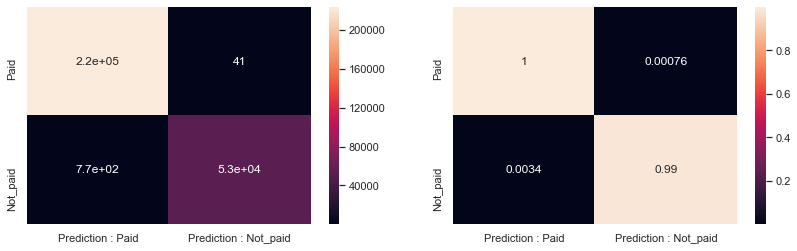

The Logistic-Regressions Confusion Matrix : None


In [39]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(solver ='liblinear') #the solver is specified to avoid UserWarning
LR.fit(X_train, y_train)

#We look at the score
print("Train Score : ", round(LR.score(X_train, y_train)*100,2), "%")
print("Test Score :", round(LR.score(X_test, y_test)*100,2), "%")
print("The Logistic-Regressions Confusion Matrix :", confusion_matrix(y_test, LR.predict(X_test)))

The Logistic Regression prediction is very good, but the prediction "Paid" when in truth the individual has "Not_paid" can surely still be reduced.

#### B) Random Forest Classifier

I tried the Random Forest Classifier :

Train Score : 98.6 %
Test Score : 98.62 %


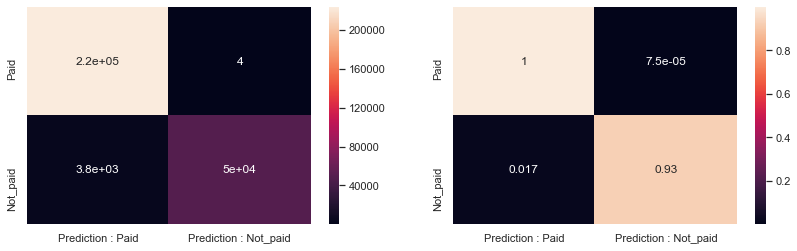

The Confusion Matrix : None


In [40]:
from sklearn.preprocessing import normalize
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=100, max_depth=8)
RF.fit(X_train, y_train)

#We look at the score
print("Train Score :", round(RF.score(X_train, y_train)*100,2), "%")
print("Test Score :", round(RF.score(X_test, y_test)*100,2), "%")
print("The Confusion Matrix :", confusion_matrix(y_test, RF.predict(X_test)))

The model is good, but too dangerous to use for a bank. Indeed, if Lending Club had followed this algorithm in this particular case, more than 3 800 loans would have been allowed to borrowers who would not have reimbursed their loans.

#### C) XGBoost

I have also tested the XGBoost method, which is reputed to be very efficient.

[18:27:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Train Score : 99.99 %
Test Score : 99.97 %


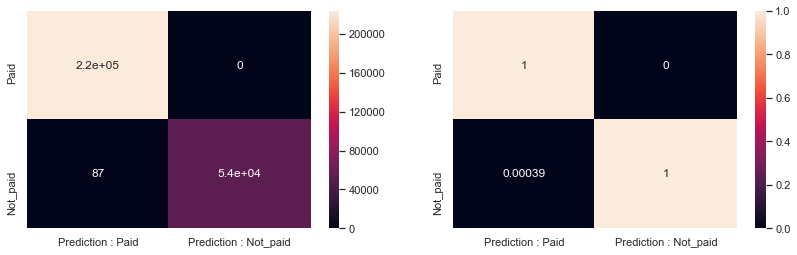

The Confusion Matrix : None


In [41]:
from xgboost import XGBClassifier

boost = XGBClassifier(use_label_encoder=False)
boost.fit(X_train, y_train)

#We look at the score
print("Train Score :", round(boost.score(X_train, y_train)*100,2), "%")
print("Test Score :", round(boost.score(X_test, y_test)*100,2), "%")
print("The Confusion Matrix :", confusion_matrix(y_test, boost.predict(X_test)))

Seeing the "Train Score", we can first think that XGBoost overlearns. However, the confusion matrix looks very good, especially the normalized matrix on the right.

## Conclusion


After working on our data, keeping as many columns as possible and transforming the data from characters to numbers, we get very satisfying results. 


If all the methods are correct, two stand out: **XGBoost** and the **Logistic Regression**. For XGBoost, the algorithm only has few errors. 

The Random Forest Classifier methods can be set aside because it is much less accurate.



However, we would probably have to continue to transform deleted columns (such as those that indicated months and years), if we wanted to further reduce the errors of our algorithm, and thus reduce the losses of Lending Club.

## Annex

At first, I thought of using the KNN method and as the algorithm was slow, I used the LASSO method to select only a few variables.
I had to put this part in an annex because it was very very slow and not so helpful. I decided to keep my code, because it could be used again later.

- **LASSO** and Variables choice

In [42]:
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso

scaler = StandardScaler()
data = scaler.fit(acc_df_reduced_ML).transform(acc_df_reduced_ML.fillna(0))

In [43]:
yindex = acc_df_reduced_ML.columns.get_loc("loan_status")
lasso1 = Lasso(fit_intercept= False, normalize = False, alpha = 0.2)
lasso1.fit(np.delete(data, yindex, axis = 1), data[:,yindex])

Lasso(alpha=0.2, copy_X=True, fit_intercept=False, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [44]:
acc_df_reduced_ML.select_dtypes(include=np.number).drop("loan_status", axis = 1).columns[np.abs(lasso1.coef_)>0]

Index(['total_rec_prncp', 'recoveries', 'last_fico_range_high'], dtype='object')

The LASSO method gives us 3 variables that best explain loan_status. We will keep them for the KNN-Method.

- **KNN data preprocessing**

In [45]:
acc_df_reduced_knn = acc_df_reduced[['loan_status','total_rec_prncp', 'recoveries', 'last_fico_range_high']]

In [46]:
acc_df_reduced_knn = acc_df_reduced_knn.dropna(axis=0).reset_index(drop=True)

print('We still have',round(acc_df_reduced_knn.shape[0]/acc_df.shape[0]*100), '% of the originals rows')

#we separate the data: 75% for training and 25% for testing
from sklearn.model_selection import train_test_split
X_train_knn, X_test_knn, y_train_knn, y_test_knn = train_test_split(
    acc_df_reduced_knn.drop(columns='loan_status'),
    acc_df_reduced_knn['loan_status'])

# then we normalize the data, to simplify the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_knn = scaler.fit_transform(X_train_knn)
X_test_knn = scaler.transform(X_test_knn)

We still have 60 % of the originals rows


- **KNN Classifier**

Train Score : 98.59 %
Test Score : 97.48 %


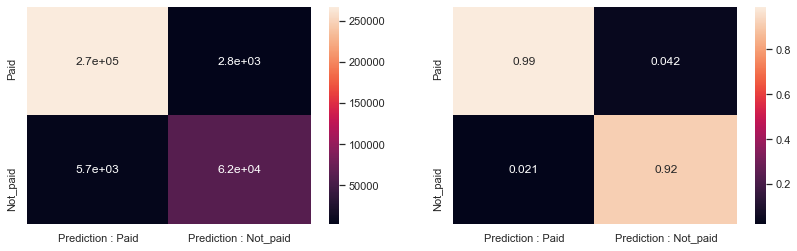

The KNN-Methods Confusion Matrix : None


In [47]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train_knn, y_train_knn)

#We look at the score
print("Train Score :", round(knn.score(X_train_knn, y_train_knn)*100,2),"%")
print("Test Score :", round(knn.score(X_test_knn, y_test_knn)*100,2),"%")
print("The KNN-Methods Confusion Matrix :", confusion_matrix(y_test_knn, knn.predict(X_test_knn)))

The algorithm takes a lot of time for a not so convincing result, that's why I chose to put it in annex. 
The big interest of this method is to show that it is still quite efficient, while it is based on only 3 variables, chosen with the LASSO.